# Obdelava podatkov 2. del

In [2]:
import datetime
import csv
import pandas as pd
import numpy as np

In [2]:
#podatki iz speedtesta
# to bomo analizirali



In [5]:
column_names = [ 'Type A', 'Measure A', 'Units A',
                 'Type B', 'Measure B', 'Units B',
                 'Type C', 'Measure C', 'Units C', 
                 'Datetime']

In [10]:
# najprej uvozimo csv
df_redundant = pd.read_csv('data/DATA_rpi_data_long_R.csv', names = column_names)

In [11]:
df_redundant.head()

,Type A,Measure A,Units A,Type B,Measure B,Units B,Type C,Measure C,Units C,Datetime
0,Ping:,26.992,ms,Download:,91.80,Mbit/s,Upload:,14.31,Mbit/s,2016-11-24 13:36:25
1,Ping:,24.532,ms,Download:,88.19,Mbit/s,Upload:,14.12,Mbit/s,2016-11-24 13:36:55
2,Ping:,20.225,ms,Download:,59.86,Mbit/s,Upload:,14.11,Mbit/s,2016-11-24 13:37:25
3,Ping:,19.332,ms,Download:,91.81,Mbit/s,Upload:,14.22,Mbit/s,2016-11-24 13:37:57
4,Ping:,22.494,ms,Download:,92.05,Mbit/s,Upload:,14.08,Mbit/s,2016-11-24 13:38:27


**Urejanje prikaza podatkov**



In [12]:
# zato, da imamo na voljo tudi originalne podatke
df_compact = df_redundant.copy()

In [13]:
# zdaj bomo preimenovali stolpce. Kar mi rabimo, so stolpci Measure A, B in C


In [14]:
map_dict = {'Measure A':'Ping (ms)', 'Measure B': 'Download (Mbit/s)', 'Measure C': 'Upload (Mbit/s)'}

In [15]:
df_compact.rename(columns = map_dict, inplace = True)

In [16]:
df_compact.head()

,Type A,Ping (ms),Units A,Type B,Download (Mbit/s),Units B,Type C,Upload (Mbit/s),Units C,Datetime
0,Ping:,26.992,ms,Download:,91.80,Mbit/s,Upload:,14.31,Mbit/s,2016-11-24 13:36:25
1,Ping:,24.532,ms,Download:,88.19,Mbit/s,Upload:,14.12,Mbit/s,2016-11-24 13:36:55
2,Ping:,20.225,ms,Download:,59.86,Mbit/s,Upload:,14.11,Mbit/s,2016-11-24 13:37:25
3,Ping:,19.332,ms,Download:,91.81,Mbit/s,Upload:,14.22,Mbit/s,2016-11-24 13:37:57
4,Ping:,22.494,ms,Download:,92.05,Mbit/s,Upload:,14.08,Mbit/s,2016-11-24 13:38:27


In [17]:
drop_list = ['Type A', 'Type B', 'Type C', 'Units A', 'Units B', 'Units C']

In [19]:
df_compact.drop(drop_list, axis = 1, inplace = True)

In [20]:
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Datetime
0,26.992,91.80,14.31,2016-11-24 13:36:25
1,24.532,88.19,14.12,2016-11-24 13:36:55
2,20.225,59.86,14.11,2016-11-24 13:37:25
3,19.332,91.81,14.22,2016-11-24 13:37:57
4,22.494,92.05,14.08,2016-11-24 13:38:27


In [21]:
#poglejmo podatkovne tipe
df_compact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 4 columns):
Ping (ms)            679 non-null object
Download (Mbit/s)    679 non-null object
Upload (Mbit/s)      673 non-null float64
Datetime             673 non-null object
dtypes: float64(1), object(3)
memory usage: 21.3+ KB


In [22]:
# ni optimalno, da so Ping, Download, Datetime in Upload objects



In [25]:
# razdelimo Datetime na Date in na Time
pd.to_datetime(df_compact['Datetime'][0]).date()

datetime.date(2016, 11, 24)

In [26]:
# tako naredimo za vse vrstice v stolpcu

In [39]:
df_compact['Date'] = pd.to_datetime(df_compact['Datetime']).dt.date

In [40]:
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Datetime,Date
0,26.992,91.80,14.31,2016-11-24 13:36:25,2016-11-24
1,24.532,88.19,14.12,2016-11-24 13:36:55,2016-11-24
2,20.225,59.86,14.11,2016-11-24 13:37:25,2016-11-24
3,19.332,91.81,14.22,2016-11-24 13:37:57,2016-11-24
4,22.494,92.05,14.08,2016-11-24 13:38:27,2016-11-24


In [31]:
df_compact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 5 columns):
Ping (ms)            679 non-null object
Download (Mbit/s)    679 non-null object
Upload (Mbit/s)      673 non-null float64
Datetime             673 non-null object
Date                 673 non-null object
dtypes: float64(1), object(4)
memory usage: 26.6+ KB


In [34]:
# lahko tudi tako

df_compact['Date'] = df_compact['Datetime'].apply(lambda dt_str: pd.to_datetime(dt_str).date())

In [35]:
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Datetime,Date
0,26.992,91.80,14.31,2016-11-24 13:36:25,2016-11-24
1,24.532,88.19,14.12,2016-11-24 13:36:55,2016-11-24
2,20.225,59.86,14.11,2016-11-24 13:37:25,2016-11-24
3,19.332,91.81,14.22,2016-11-24 13:37:57,2016-11-24
4,22.494,92.05,14.08,2016-11-24 13:38:27,2016-11-24


In [36]:
df_compact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 5 columns):
Ping (ms)            679 non-null object
Download (Mbit/s)    679 non-null object
Upload (Mbit/s)      673 non-null float64
Datetime             673 non-null object
Date                 673 non-null object
dtypes: float64(1), object(4)
memory usage: 26.6+ KB


In [41]:
df_compact['Time'] = pd.to_datetime(df_compact['Datetime']).dt.time

In [42]:
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Datetime,Date,Time
0,26.992,91.80,14.31,2016-11-24 13:36:25,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24 13:36:55,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24 13:37:25,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24 13:37:57,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24 13:38:27,2016-11-24,13:38:27


In [43]:
df_compact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 6 columns):
Ping (ms)            679 non-null object
Download (Mbit/s)    679 non-null object
Upload (Mbit/s)      673 non-null float64
Datetime             673 non-null object
Date                 673 non-null object
Time                 673 non-null object
dtypes: float64(1), object(5)
memory usage: 32.0+ KB


In [46]:
# v dataframeu je to še vedno object, ker imamo manjkajoče vrednosti
df_compact.isnull().sum()

Ping (ms)            1
Download (Mbit/s)    1
Upload (Mbit/s)      7
Datetime             7
Date                 7
Time                 7
dtype: int64

In [47]:
# drugi način z lambdo
df_compact['Time'] = df_compact['Datetime'].apply(lambda dt_str: pd.to_datetime(dt_str).time())

ValueError: NaTType does not support time

In [48]:
# tako ne dela, ker je ta funkcija time() malo drugačna. Zato moramo v dveh korakih:
temp = df_compact['Datetime'].apply(lambda dt_str: pd.to_datetime(dt_str))
df_compact['Time'] = temp.dt.time
            

In [50]:
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Datetime,Date,Time
0,26.992,91.80,14.31,2016-11-24 13:36:25,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24 13:36:55,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24 13:37:25,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24 13:37:57,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24 13:38:27,2016-11-24,13:38:27


In [56]:
# odstranimo Datetime stolpec, ker ga ne rabimo več
df_compact.drop(['Datetime'], inplace = True, axis = 1)

KeyError: "['Datetime'] not found in axis"

In [53]:
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27


In [57]:
type(df_compact['Date'][0])

datetime.date

In [58]:
type(df_compact['Time'][0])

datetime.time

In [59]:
# velikokrat potem, ko očistimo podatke, jih ponovno izvozimo v csv

In [60]:
df_compact.to_csv('data/OUT_rpi_data_compact.csv')

**Urejanje datuma in časa**



## Visualization


#### Clean and Analyze Data


**Čiščenje podatkov**



In [61]:
#prebran je že dataframe (df_compact)

In [62]:
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27


In [63]:
df_compact = pd.read_csv('data/OUT_rpi_data_compact.csv')

In [64]:
df_compact.head()

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25
3,3,19.332,91.81,14.22,2016-11-24,13:37:57
4,4,22.494,92.05,14.08,2016-11-24,13:38:27


In [70]:
# problem je v tem, da nam je od spredaj pustil indekse. Zato imamo stolpec Unnamed: 0
# tega nočemo, zato to odstranimo
df_compact.drop('Unnamed: 0', axis = 1, inplace = True)

In [71]:
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27


In [73]:
NaNs_in_df = df_compact.isnull()

In [75]:
type(NaNs_in_df)

pandas.core.frame.DataFrame

In [76]:
NaNs_in_df.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [77]:
NaNs_in_df.sum()

Ping (ms)            1
Download (Mbit/s)    1
Upload (Mbit/s)      7
Date                 7
Time                 7
dtype: int64

In [82]:
NaNs_total = NaNs_in_df.sum().sum()
NaNs_total

23

In [79]:
#koliko je to procentov manjkajočih vrednosti?

In [80]:
len(df_compact)

680

In [92]:
all_data = len(df_compact)*len(df_compact.columns)
all_data

3400

In [93]:
NaNs_pct = np.round(NaNs_total/all_data*100, decimals = 4)

In [94]:
print(f'The DataFrame contains : {NaNs_total} NaNs, equal to {NaNs_pct}% of the measurements')

The DataFrame contains : 23 NaNs, equal to 0.6765% of the measurements


In [95]:
# ker je majhen procent napak, lahko zavržemo te vrednosti

In [97]:
df_compact_clean = df_compact.dropna()

In [98]:
df_compact_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 673 entries, 0 to 679
Data columns (total 5 columns):
Ping (ms)            673 non-null object
Download (Mbit/s)    673 non-null object
Upload (Mbit/s)      673 non-null float64
Date                 673 non-null object
Time                 673 non-null object
dtypes: float64(1), object(4)
memory usage: 31.5+ KB


**Change values format.**

In [99]:
df_compact_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 673 entries, 0 to 679
Data columns (total 5 columns):
Ping (ms)            673 non-null object
Download (Mbit/s)    673 non-null object
Upload (Mbit/s)      673 non-null float64
Date                 673 non-null object
Time                 673 non-null object
dtypes: float64(1), object(4)
memory usage: 31.5+ KB


In [106]:
df_compact_clean.reset_index(inplace = True, drop = True)

In [107]:
# zdaj gre index samo do 672
df_compact_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 6 columns):
index                673 non-null int64
Ping (ms)            673 non-null object
Download (Mbit/s)    673 non-null object
Upload (Mbit/s)      673 non-null float64
Date                 673 non-null object
Time                 673 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 31.6+ KB


In [108]:
df_compact_clean.head()

,index,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25
3,3,19.332,91.81,14.22,2016-11-24,13:37:57
4,4,22.494,92.05,14.08,2016-11-24,13:38:27


In [109]:
df_compact_clean.drop(columns = 'index', inplace = True)

/home/mladen/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [110]:
df_compact_clean.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27


In [117]:
df_compact_clean = df_compact_clean.astype({'Ping (ms)': 'float64', 'Download (Mbit/s)': 'float64','Upload (Mbit/s)': 'float64'} )

In [118]:
df_compact_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 5 columns):
Ping (ms)            673 non-null float64
Download (Mbit/s)    673 non-null float64
Upload (Mbit/s)      673 non-null float64
Date                 673 non-null object
Time                 673 non-null object
dtypes: float64(3), object(2)
memory usage: 26.4+ KB


In [120]:
df_compact_clean = df_compact_clean.astype({'Date': 'datetime64', 'Time': 'datetime64'})

In [121]:
df_compact_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 5 columns):
Ping (ms)            673 non-null float64
Download (Mbit/s)    673 non-null float64
Upload (Mbit/s)      673 non-null float64
Date                 673 non-null datetime64[ns]
Time                 673 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(3)
memory usage: 26.4 KB


In [123]:
# drugače bi prerazporedili celice

In [124]:
reidexed_columns = ['Date', 'Time', 'Ping (ms)','Download (Mbit/s)','Upload (Mbit/s)']

In [125]:
df_compact_clean = df_compact_clean.reindex(columns = reidexed_columns)

In [126]:
df_compact_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,2019-06-03 13:36:25,26.992,91.80,14.31
1,2016-11-24,2019-06-03 13:36:55,24.532,88.19,14.12
2,2016-11-24,2019-06-03 13:37:25,20.225,59.86,14.11
3,2016-11-24,2019-06-03 13:37:57,19.332,91.81,14.22
4,2016-11-24,2019-06-03 13:38:27,22.494,92.05,14.08


In [127]:
df_clean = df_compact_clean.copy()

## Basic statistics


**Calculate mean and standard deviation using Pandas.**


In [128]:
means = df_clean.mean()

In [131]:
means

Ping (ms)            21.115452
Download (Mbit/s)    90.449212
Upload (Mbit/s)      13.697608
dtype: float64

In [132]:
stands = df_clean.std()

In [133]:
stands

Ping (ms)            5.161225
Download (Mbit/s)    3.465647
Upload (Mbit/s)      1.080471
dtype: float64

In [135]:
means['Ping (ms)']

21.115451708766724

In [140]:
print(f"Average ping time: {means['Ping (ms)']} ± {stands['Ping (ms)']} ms")
print(f"Average download speed: {means['Download (Mbit/s)']} ± {stands['Download (Mbit/s)']} Mbit/s")
print(f"Average upload speed: {means['Upload (Mbit/s)']} ± {stands['Upload (Mbit/s)']} Mbit/s")

Average ping time: 21.115451708766724 ± 5.161225495663228 ms
Average download speed: 90.44921248142644 ± 3.4656470318152284 Mbit/s
Average upload speed: 13.697607726597328 ± 1.0804708853031768 Mbit/s


**Izračun minimalnih in maksimalnih vrednosti**


In [141]:
mins = df_clean.min()

In [142]:
mins

Date                 2016-11-24 00:00:00
Time                 2019-06-03 13:36:25
Ping (ms)                         16.167
Download (Mbit/s)                  58.48
Upload (Mbit/s)                     6.21
dtype: object

In [143]:
maxs = df_clean.max()

In [144]:
maxs

Date                 2016-11-24 00:00:00
Time                 2019-06-03 19:18:16
Ping (ms)                         76.528
Download (Mbit/s)                  92.87
Upload (Mbit/s)                    14.55
dtype: object

In [ ]:
print(f'Min ping time: {mima_ping[0]} ms. Max ping time: {mima_ping[1]} ms')
print(f'Min download speed: {mima_download[0]} Mbit/s. Max download speed: {mima_download[1]} Mbit/s')
print(f'Min upload speed: {mima_upload[0]} Mbit/s. Max upload speed: {mima_upload[1]} Mbit/s')

In [148]:
# sam izračuna vse glavne statistične parametre. Lahko ga tudi zaokrožimo kot spodaj
round(df_clean.describe(),2)

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
count,673.00,673.00,673.00
mean,21.12,90.45,13.70
std,5.16,3.47,1.08
min,16.17,58.48,6.21
25%,19.11,90.22,13.64
50%,20.32,91.56,13.98
75%,21.84,92.07,14.18
max,76.53,92.87,14.55


**Uporaba idxmin, idxmax and iloc**


In [151]:
# skripta, ki nam pošlje mail, ko pade internet


In [152]:
# rabimo čas, ko se je zgodil minimum in maximum

In [156]:
df_clean.loc[df_clean['Ping (ms)'].idxmin(),'Date']

Timestamp('2016-11-24 00:00:00')

In [157]:
df_clean.loc[df_clean['Ping (ms)'].idxmin(),'Time']

Timestamp('2019-06-03 15:26:20')

In [164]:
# skripta, ki nam pošlje mail, ko pade internet

In [165]:
print(f"Ping measure reached minimum on {df_clean.loc[df_clean['Ping (ms)'].idxmin(),'Date'].date()} at {df_clean.loc[df_clean['Ping (ms)'].idxmin(),'Time'].time()}")

print(f"Ping measure reached maximum on {df_clean.loc[df_clean['Ping (ms)'].idxmax(),'Date'].date()} at {df_clean.loc[df_clean['Ping (ms)'].idxmax(),'Time'].time()}")

Ping measure reached minimum on 2016-11-24 at 15:26:20
Ping measure reached maximum on 2016-11-24 at 17:30:06


In [166]:
# korelacija. 
# analiziramo kako je upload povezan z downloadom

In [167]:
df_corr = df_clean.corr()

In [169]:
df_corr

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
Ping (ms),1.000000,-0.045626,-0.463099
Download (Mbit/s),-0.045626,1.000000,0.083690
Upload (Mbit/s),-0.463099,0.083690,1.000000


In [174]:
print(f'Correlation coefficient between ping and download: {df_corr.iloc[0,1]}')
#print(f'Correlation coefficient between ping and upload: {}')
#print(f'Correlation coefficient between upload and download: {}')

Correlation coefficient between ping and download: -0.045626110258379995


## Visualize Data



In [176]:
import matplotlib.pyplot as plt
%matplotlib inline 

**Plot Internet speed stats.**


TypeError: 'str' object is not callable

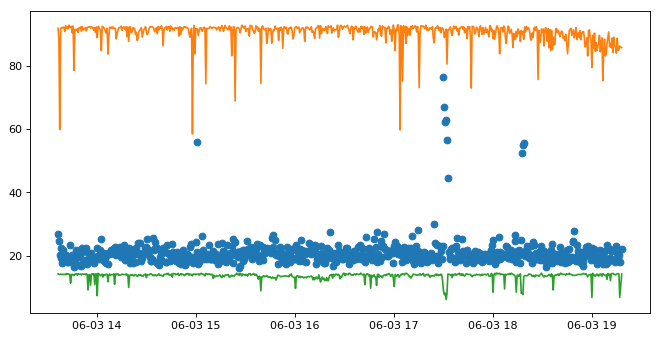

In [192]:
plt.figure(figsize = (10,5), dpi = 80)
t = pd.to_datetime(df_clean['Time'])

plt.plot(t, df_clean['Ping (ms)'], 'o', label = 'Ping (ms)')
plt.plot(t, df_clean['Download (Mbit/s)'], label = 'Download (Mbit/s)')
plt.plot(t, df_clean['Upload (Mbit/s)'], label = 'Upload (Mbit/s)')

plt.title('Internet speed')

plt.legend()
plt.show()


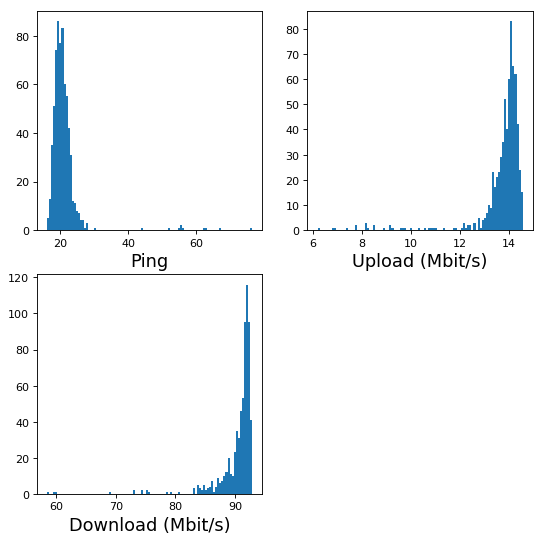

In [196]:
# histogrami
plt.figure(figsize = (8,8), dpi = 80)

plt.subplot(2,2,1)
plt.hist(df_clean['Ping (ms)'], bins = 100)
plt.xlabel('Ping', fontsize = 16)
plt.tick_params(labelsize = 10)

plt.subplot(2,2,2)
plt.hist(df_clean['Upload (Mbit/s)'], bins = 100)
plt.xlabel('Upload (Mbit/s)', fontsize = 16)
plt.tick_params(labelsize = 10)

plt.subplot(2,2,3)
plt.hist(df_clean['Download (Mbit/s)'], bins = 100)
plt.xlabel('Download (Mbit/s)', fontsize = 16)
plt.tick_params(labelsize = 10)



## Internet Meter Anomaly Detection 


**Create a Dataframe and modify the quantities**



In [197]:
# interaktivne fore

In [198]:
# ping, upload in download vse v isti graf. Podatki, ki bodo izstopali, so čudni.

In [199]:
df_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,2019-06-03 13:36:25,26.992,91.80,14.31
1,2016-11-24,2019-06-03 13:36:55,24.532,88.19,14.12
2,2016-11-24,2019-06-03 13:37:25,20.225,59.86,14.11
3,2016-11-24,2019-06-03 13:37:57,19.332,91.81,14.22
4,2016-11-24,2019-06-03 13:38:27,22.494,92.05,14.08


In [200]:
# ping pretvorimo v ping rate = 1 / ping, da so podatki bolj ekvivalentni
df_rates = df_clean.copy()

In [201]:
df_rates.drop(['Date', 'Time', 'Ping (ms)'], axis = 1, inplace = True)

In [202]:
lookup = {'Download (Mbit/s)': 'download_rate', 
          'Upload (Mbit/s)': 'upload_rate'}


In [204]:
df_rates.rename(columns = lookup, inplace = True)

In [205]:
ping_rate = 1 / df_clean['Ping (ms)']

In [210]:
# da dobimo sekunde
ping_rate = ping_rate * 1000

In [211]:
df_rates['ping_rate'] = ping_rate

In [212]:
df_rates.head()

,download_rate,upload_rate,ping_rate
0,91.80,14.31,37.048014
1,88.19,14.12,40.763085
2,59.86,14.11,49.443758
3,91.81,14.22,51.727705
4,92.05,14.08,44.456299


**Vizualizacija podatkov**



In [213]:
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact

In [214]:
def f(x):
    return x**2

In [216]:
# prvi argument je funkcija, s katero interaktira, drugi je x
interact(f, x=(0,100))

interactive(children=(IntSlider(value=50, description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f(x)>

In [220]:
def scatter_view(x,y,z, azim, elev):
    fig = plt.figure(figsize = (10,5), dpi = 80)
    ax = Axes3D(fig)
    
    ax.scatter(x,y,z)
    ax.set_xlabel("D rate (Mbit/s)", fontsize = 16)
    ax.set_xlabel("U rate (Mbit/s)", fontsize = 16)
    ax.set_xlabel("P rate (1/s)", fontsize = 16)
    
    ax.azim = azim
    ax.elev = elev
    
    
    

In [221]:
xi = df_rates['download_rate']
yi = df_rates['upload_rate']
zi = df_rates['ping_rate']

interact(lambda azim, elev: scatter_view(xi, yi, zi, azim, elev), azim=(0,90), elev = (0,90))

plt.show()

interactive(children=(IntSlider(value=45, description='azim', max=90), IntSlider(value=45, description='elev',…

In [222]:
#  datacamp.com je dobra stran za učenje. Večina tečajev je plačljivih, so pa tudi brezplačni.
# dobra stvar je /community/tutorials, kjer je veliko tutorialov
# več kot 10.000 jih je in vsi so zastonj

**Euclidean Anomaly Detection**
